# DMG2 Assignment 2 : Problem 2

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from anytree import Node,RenderTree
from anytree.exporter import DotExporter

from IPython.display import Image

# warnings.filterwarnings('ignore')

In [2]:
#DATA_DIR = 'D:\\ISB\\Term3\\DMG2\\assignment\\assignment1\\datasets\\mnist'
DATA_DIR = '/home/jishnu/Documents/ISB/Term3/dmg2/assignments/hw_assignment1/dmg2/datasets/mnist'
WORK_DIR = '/home/jishnu/Documents/ISB/Term3/dmg2/assignments/assignment2'

In [3]:
train = pd.DataFrame(columns=['V{}'.format(i) for i in range(1,785)] + ['label'])
test = pd.DataFrame(columns=['V{}'.format(i) for i in range(1,785)] + ['label'])
for num in range(10):
    # Consolidating training data
    temp_train = pd.read_csv(os.path.join(DATA_DIR,'train{0}.csv'.format(num)),usecols=['V{}'.format(i) for i in range(1,785)])
    temp_train['label'] = num
    train = train.append(temp_train,ignore_index=True)
    # Consolidating test data
    temp_test = pd.read_csv(os.path.join(DATA_DIR,'test{0}.csv'.format(num)),usecols=['V{}'.format(i) for i in range(1,785)])
    temp_test['label'] = num
    test = test.append(temp_test,ignore_index=True)

In [4]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train = train.dropna()
test = test.dropna()

In [6]:
train.isnull().values.any()

False

In [7]:
test.isnull().values.any()

False

## Building Binary Heirarchical Classifier using Linear SVM

In [8]:
train_test_acc = pd.DataFrame(columns=['node','training_acc','test_acc'])

**Building tree data structure using Anytree module**

Building dictionary of Nodes(Anytree Data Structure)

In [9]:
root = Node("root")
node_dict = {'0' : Node("Class_0",parent=root),
             '1' : Node("Class_1",parent=root),
             '2' : Node("Class_2",parent=root),
             '3' : Node("Class_3",parent=root),
             '4' : Node("Class_4",parent=root),
             '5' : Node("Class_5",parent=root),
             '6' : Node("Class_6",parent=root),
             '7' : Node("Class_7",parent=root),
             '8' : Node("Class_8",parent=root),
             '9' : Node("Class_9",parent=root)                
            }

Iterating through all class labels, and building binary heirarchical classifier

In [10]:
train_svm = train
train_svm['label'] = train_svm['label'].astype('str')

test_svm = test
test_svm['label'] = test_svm['label'].astype('str')

classes = [str(num) for num in range(10)]
# svm_classes = {}
# train_scores = {}

while len(classes) > 2:
    svm_classes = {}
    train_scores = {}
    test_scores = {}
    for classNo,nestedClassNo in itertools.combinations(classes, 2):
        # Building training and test data for pair of classes
        train_temp = train_svm.loc[train_svm['label'].isin([classNo,nestedClassNo])]
        X_train = train_temp.iloc[:,:784]
        Y_train = train_temp.iloc[:,784]
        test_temp = test_svm.loc[test_svm['label'].isin([classNo,nestedClassNo])]
        X_test = test_temp.iloc[:,:784]
        Y_test = test_temp.iloc[:,784]
        # Fitting SVM classifier on pair of classes
        svm_classes['{0}_{1}'.format(classNo,nestedClassNo)] = LinearSVC(random_state=0)
        svm_classes['{0}_{1}'.format(classNo,nestedClassNo)].fit(X_train,Y_train.astype('int'))
        # Calculating scores on training and test data
        train_scores['{0}_{1}'.format(classNo,nestedClassNo)] = svm_classes['{0}_{1}'.format(classNo,nestedClassNo)].score(X_train,Y_train.astype('int'))
        test_scores['{0}_{1}'.format(classNo,nestedClassNo)] = svm_classes['{0}_{1}'.format(classNo,nestedClassNo)].score(X_test,Y_test.astype('int'))
        
    # Finding class pair with least training accuracy
    min_class_pair = min(train_scores,key=train_scores.get)
    
    # Appending training and test accuracies to dataframe
    train_test_acc = train_test_acc.append({'node' : min_class_pair, 
                                            'training_acc' : train_scores[min_class_pair], 
                                            'test_acc' : test_scores[min_class_pair]},
                                           ignore_index=True)
    
    # Updating classes list
    classes = [val for val in classes if val not in min_class_pair.split('_')]
    classes.append(''.join(min_class_pair.split('_')))
    
    # Updating Nodes
    node_dict[''.join(min_class_pair.split('_'))] = Node('Class_{0}'.format(min_class_pair),parent=root)
    for key in min_class_pair.split('_'):
        node_dict[key].parent = node_dict[''.join(min_class_pair.split('_'))]
        
    # Relabeling train_svm
    train_svm.loc[train_svm['label'].isin(min_class_pair.split('_')),'label'] = ''.join(min_class_pair.split('_'))
    
    # Relabeling test_svm
    test_svm.loc[test_svm['label'].isin(min_class_pair.split('_')),'label'] = ''.join(min_class_pair.split('_'))
    
    print(classes)
        
    

['0', '1', '2', '3', '4', '5', '6', '8', '79']
['0', '1', '2', '4', '6', '8', '79', '35']
['0', '1', '2', '4', '6', '79', '835']
['0', '1', '4', '6', '79', '2835']
['0', '1', '6', '2835', '479']
['0', '1', '6', '2835479']
['0', '1', '62835479']
['1', '062835479']


## Plotting entire tree

In [11]:
DotExporter(root).to_picture("{0}/img/root.png".format(WORK_DIR))

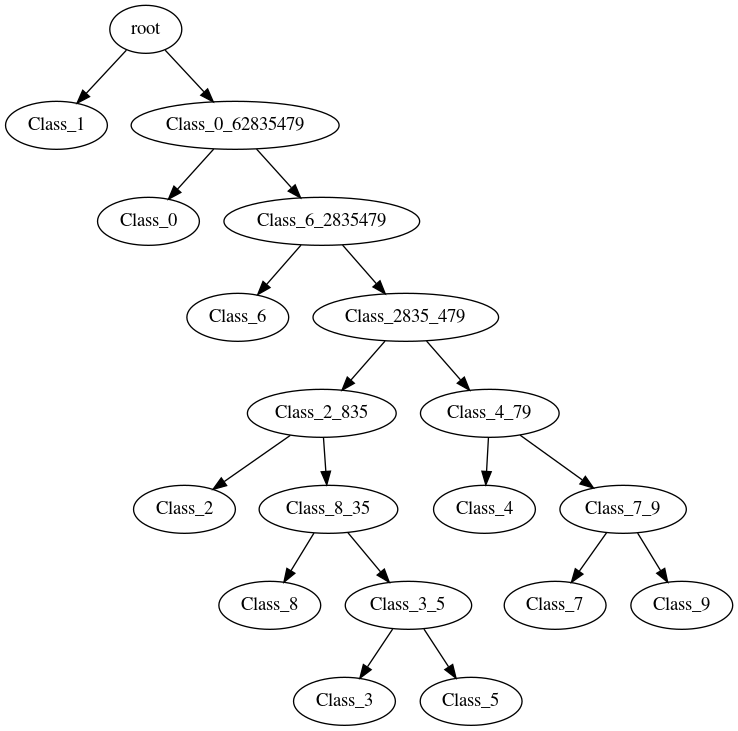

In [12]:
Image(filename="{0}/img/root.png".format(WORK_DIR)) 

## Training and Test Accuracies at each node

In [14]:
print(train_test_acc)

         node  training_acc  test_acc
0         7_9      0.873740  0.864943
1         3_5      0.950036  0.925982
2        8_35      0.915282  0.901197
3       2_835      0.956234  0.940488
4        4_79      0.969990  0.952593
5    2835_479      0.972226  0.959338
6   6_2835479      0.980794  0.974700
7  0_62835479      0.990421  0.985431
